$$Assignment 1 - Regression$$

## 介绍 :
    在这个作业中，你将对数据集执行线性回归，并使用交叉验证来分析你的结果。
    除了计算和应用封闭形式的解决方案之外，您还将从头开始为线性回归实现一个梯度下降算法。
    和所有的作业一样，除非被明确告知，否则你不能使用任何违背作业“精神”的函数。
    对于这个赋值，意味着任何线性回归函数。你可以使用统计和线性代数函数做类似的事情:

## 一 . 理论
    1. (10pts)考虑以下数据 :
    Data = [[-2,-5,-3,0,-6,-2,1,5,-1,3]
            [1,-4,1,3,11,5,0,-1,-3,1]]
    (a) 使用最小二乘估计(LSE)计算线性回归的系数，其中第二个值(列)是因变量(待预测的值)，而第一列是唯一的特征。展示你的工作，记住添加一个偏差特征和标准化特征。使用所有的数据计算这个模型(不要担心分离成训练和测试集)。
    (b) 利用sklearn确定系数和截距项。linear_model LinearRegression函数。

    2. 对于函数g(x) = (x-1)**4，其中x为单值(非向量或矩阵):
    (a) (3pts)相对于x的梯度是多少?展示你的作品来支持你的答案。
    (b) (3pts) g(x)的全局最小值是多少?展示你的作品来支持你的答案。
    (c) (3pts)使用matplotlib绘制x vs g(x)，并在您的报告中使用此图像。

In [1]:
#1.(a) 代公式 w =(X.T*X)^(-1)*X.T*Y
import numpy as np
Data = np.array([[-2,-5,-3,0,-6,-2,1,5,-1,3],[1,-4,1,3,11,5,0,-1,-3,1]])
X = np.vstack((np.ones((Data[0].shape[0])),Data[0])).T
y = Data[1]
theta0,theta1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

In [2]:
theta0,theta1

(0.9576923076923078, -0.4423076923076923)

In [3]:
#1.(b) 调sklearn库
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = Data[0].reshape(-1,1)
reg.fit(X,y)
theta0,theta1 = reg.intercept_,*reg.coef_
theta0,theta1

(0.9576923076923076, -0.44230769230769235)

Text(0.5, 1.0, 'g(x) = (x-1)^4')

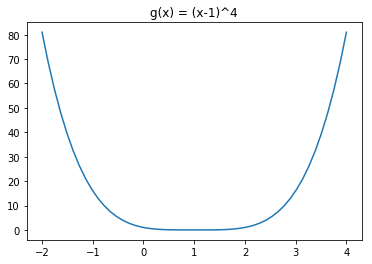

In [4]:
#2.(c) 画g(x)图像
import matplotlib.pyplot as plt
x = np.linspace(-2,4,50)
y = (x-1)**4
plt.plot(x,y)
plt.title('g(x) = (x-1)^4')

## 二 . 闭型线性回归
    下载数据集x06Simple.csv。基社盟的黑板上。
    这个数据集的头信息在它的第一行，然后所有的后续行格式:
    Rowid , x(i,1) , x(i,2) , y(i)
    您的代码应该适用于任何CSV数据集:
    第一列是头信息，第一列是某个整数索引，然后是实值特性的D列，最后是目标值
### 写一个代码 :
    1. 读取数据，忽略第一行(标题)和第一列(索引)。
    2. 随机数据
    3. 选择数据的前2/3(四舍五入)用于训练，其余的用于测试
    4. 使用训练数据标准化数据(当然最后一列除外)
    5. 计算线性回归的封闭解
    6. 将解决方案应用于测试样本
    7. 计算均方根误差(RMSE): 
   $$\sqrt{\frac{1}{N}\sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2}$$
   
       其中，Y(i)hat为观测X(i)的预测值。
### 实现细节 :
    1. 在随机数据之前生成的随机数的种子
    2. 不要忘记添加偏见功能!
### 在你的报告中，你需要:
    1. 最终模型为y=θ_0 + θ_1*x(:,1) + ... 
    2. 均方根误差。

In [5]:
import numpy as np
data = np.loadtxt('x06Simple.csv',delimiter=',',skiprows=1)

In [6]:
# 打乱原数据
data = data[:,1:]
np.random.shuffle(data)

In [7]:
data.shape

(44, 3)

In [8]:
data

array([[ 111.,   27., 4495.],
       [  14.,   31.,  590.],
       [  28.,   27., 1215.],
       [ 139.,   27., 4600.],
       [  14.,   29.,  590.],
       [  69.,   29., 3920.],
       [  28.,   25., 1315.],
       [  83.,   31., 3020.],
       [  97.,   29., 4515.],
       [ 125.,   27., 4535.],
       [  97.,   31., 3030.],
       [  83.,   25., 3535.],
       [  97.,   27., 4315.],
       [ 139.,   29., 4565.],
       [ 153.,   25., 4600.],
       [ 111.,   31., 3040.],
       [  83.,   29., 3920.],
       [  69.,   31., 2710.],
       [  28.,   31., 1205.],
       [  14.,   25.,  620.],
       [ 111.,   25., 4465.],
       [  69.,   27., 3255.],
       [  55.,   29., 2890.],
       [ 111.,   29., 4520.],
       [  55.,   25., 2600.],
       [ 125.,   25., 4530.],
       [  83.,   27., 4015.],
       [ 139.,   31., 3257.],
       [  28.,   29., 1305.],
       [ 139.,   25., 4570.],
       [  69.,   25., 3110.],
       [ 153.,   31., 3214.],
       [ 125.,   29., 4525.],
       [  

In [9]:
boundary = int(data.shape[0]*2/3)
boundary

29

In [10]:
# 划分训练集和测试集
Trainset,Testset = data[:boundary],data[boundary:]

In [11]:
# 划分训练集测试集输入输出
X_Train,y_Train,X_Test,y_Test = Trainset[:,:-1],Trainset[:,-1:],Testset[:,:-1],Testset[:,-1:]

In [12]:
# 训练集均值
mean = np.mean(X_Train,axis=0)

In [13]:
# 训练集方差
std = np.std(X_Train,axis=0,ddof=1)

In [14]:
# 训练集标准化
X_Train = (X_Train-mean)/std

In [15]:
# 测试集标准化
X_Test = (X_Test-mean)/std

In [16]:
# 训练模型参数w
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_Train,y_Train)
theta = (*reg.intercept_,*reg.coef_.flatten())
theta

(3143.862068965517, 1241.9939261204138, -179.61511817724443)

In [17]:
# 预测结果
y_pred = np.dot(X_Test,theta[1:])+theta[0]
y_pred

array([5082.05322025, 3025.02073039, 5013.15515825, 4350.4436823 ,
       2042.10621446, 3847.83372633, 2453.51271243, 1882.00469447,
       1248.67939694, 2133.30967245, 5333.35819823, 5173.25667824,
       4190.34216231, 2202.20773444, 1721.90317448])

In [18]:
# 均方根误差RMSE
RMSE = np.linalg.norm((y_pred - y_Test.T)/len(y_pred)**0.5)
RMSE

637.6829429482862

## 三. S-Folds交叉验证
    交叉验证是一种技术，在我们没有那么多数据的情况下，用来获得可靠的评估结果(因此，很难对模型进行可靠的训练和/或测试)
    在本节中，您将为几个不同的S值执行S- fold交叉验证。
    每次运行时，您将把数据分成S部分(fold)，并使用S- fold交叉验证测试S不同的模型，并通过均方根误差评估。
    此外，为了观察系统方差的影响，我们将重复这些实验几次(每次在创建褶皱之前对数据进行洗牌)。
    我们将再次在提供的fish数据集上进行实验。您可以使用sklearn KFold来执行此任务。

### 写一个代码:
    1. 读取数据，忽略第一行(标题)和第一列(索引)。
    2. 20次做以下事情:
        (a)随机数据
        (b)创建S折叠
        (c)从i=1到S
            I.选择fold i作为测试数据，其余的(S-1)折叠作为训练数据
            II.根据培训对数据进行标准化(当然最后一栏除外)数据
            III.训练一个封闭形式的线性回归模式
            IV.计算当前测试折线中每个样本的平方误差
        (d)你现在应该有N的平方误差。计算这些的RMSE。
    3. 您现在应该有20个RMSE值。计算这些的平均值和标准偏差前者应该给我们一个更好的“总体”平均值，而后者应该给我们创建的模型的方差的感觉。
### 实现细节:
    1. 不要忘记添加偏见功能!
    2. 在脚本的最开始设置您的种子值(如果您在20个测试中设置它，每个测试将拥有相同的随机打乱的数据!)
### 在你的报告中，你需要:
    1. S=3 对20个不同种子值的均方根误差的平均值和标准差。
    2. S=5 对20个不同种子值的均方根误差的平均值和标准差。
    3. S=20 对20个不同种子值的均方根误差的平均值和标准差。
    4. S=N(其中N是样本的数量)对20个不同种子值的均方根误差的平均值和标准差。这基本上就是“留一送一”的交叉验证

In [19]:
def s_folds_cross_validation(s,data):
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.linear_model import LinearRegression
    kf = KFold(n_splits = s, shuffle=True)
    RMSES = []
    for train_index,test_index in kf.split(data):
        Trainset,Testset = data[train_index],data[test_index]
        X_Train,y_Train = Trainset[:,:-1:],Trainset[:,-1:]
        X_Test,y_Test = Testset[:,:-1:],Testset[:,-1:]
        mean = np.mean(X_Train,axis=0)
        std = np.std(X_Train,axis=0,ddof=1)
        X_Train = (X_Train-mean)/std
        X_Test = (X_Test-mean)/std
        reg = LinearRegression()
        reg.fit(X_Train,y_Train)
        theta = (*reg.intercept_,*reg.coef_.flatten())
        y_pred = np.dot(X_Test,theta[1:])+theta[0]
        RMSE = np.linalg.norm((y_pred - y_Test.T)/len(y_pred)**0.5)
        RMSES.append(RMSE)
    return np.mean(RMSES)

In [20]:
def s_folds_n_times(s,n):
    return [s_folds_cross_validation(s,data) for _ in range(n)]

In [21]:
# S = 3 , 20times
rmse = s_folds_n_times(3,20)
print(np.mean(rmse))
print(np.std(rmse,ddof=1))

620.4532107744999
22.332425560895793


In [22]:
# S = 5 , 20times
rmse = s_folds_n_times(5,20)
print(np.mean(rmse))
print(np.std(rmse,ddof=1))

611.2122397270917
21.371943315681815


In [23]:
# S = 20 , 20times
rmse = s_folds_n_times(20,20)
print(np.mean(rmse))
print(np.std(rmse,ddof=1))

553.7330738866244
16.117874169567692


In [24]:
# S = N , 20times
rmse = s_folds_n_times(data.shape[0],20)
print(np.mean(rmse))
print(np.std(rmse,ddof=1))

493.4732598766559
6.116665495585157e-14


## 四. 局部加权线性回归接下来我们将做局部加权闭型线性回归。对于这一部分，可以使用sklearn train_test _split

### 写一个脚本:
    1. 读取数据，忽略第一行(标题)和第一列(索引)。
    2. 随机数据
    3. 选择数据的前2/3用于训练，其余的用于测试
    4. 使用培训数据标准化数据(当然最后一列除外)
    5. 然后为每个测试样本
        (a) 计算与训练数据相关的必要距离矩阵，以便计算局部模型
        (b) 使用本地模型评估测试样本。
        (c) 计算测试样本的平方误差。
    6. 计算均方根误差(RMSE): NY -)。式中，Y为观测X的预测值.
    
### 实现细节:
    1. 在随机数据之前生成的随机数的种子
    2. 不要忘记添加偏见功能!
    3. 使用L1距离计算距离d(a, b)。
    4. 设相似度函数B(a.b)中的k=1 =e-d(a.b)/25. 在计算局部模型时使用所有的训练实例。

### 在你的报告中，你需要:
    1. 均方根误差。

In [25]:
def calculate_weight(X,x):
    return np.diag([np.exp(-abs(sum(i-x))) for i in X])

In [26]:
W = calculate_weight(X_Train,X_Test[0])

In [27]:
def fit(X_Train,y_Train):
    X_Train = np.hstack((np.ones((X_Train.shape[0],1)),X_Train))
    return (*np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(X_Train.T,W),X_Train)),X_Train.T),W),y_Train).flatten(),)

In [28]:
theta = fit(X_Train,y_Train)
theta

(3335.0716688159114, 1238.6924858271414, -127.37085560190218)

In [29]:
y_pred = np.dot(X_Test[0],theta[1:])+theta[0]
SE = (y_pred - y_Test[0])**2
SE[0]

394510.8527956655

In [30]:
def squared_error(X_Train,y_Train,x,y):
    W = calculate_weight(X_Train,x)
    theta = fit(X_Train,y_Train)
    y_pred = np.dot(x,theta[1:])+theta[0]
    se = (y_pred - y)**2
    return se

In [31]:
rmse = np.sqrt(sum([squared_error(X_Train,y_Train,X_Test[i],y_Test[i]) for i in range(X_Test.shape[0])])/X_Test.shape[0])
rmse[0]

751.8639094440862

In [32]:
for i in range(10):
    np.random.shuffle(data)
    boundary = int(data.shape[0]*2/3)
    Trainset,Testset = data[:boundary],data[boundary:]
    X_Train,y_Train,X_Test,y_Test = Trainset[:,:-1],Trainset[:,-1:],Testset[:,:-1],Testset[:,-1:]
    mean = np.mean(X_Train,axis=0)
    std = np.std(X_Train,axis=0,ddof=1)
    X_Train = (X_Train-mean)/std
    X_Test = (X_Test-mean)/std
    print(np.sqrt(sum([squared_error(X_Train,y_Train,X_Test[i],y_Test[i]) for i in range(X_Test.shape[0])])/X_Test.shape[0]))

[605.80674642]
[773.3213806]
[556.46939952]
[736.76000664]
[549.00763401]
[628.79627239]
[735.39222925]
[705.34972611]
[799.48231631]
[607.04757473]


## 五. 梯度下降法
    正如在类中所讨论的那样，梯度下降(Ascent)是一种通用算法，当封闭形式的解不可用或无法计算时，它允许我们收敛于局部最小值(maxima)。
    在这一节中，您将实现一个梯度下降算法，以找到在前几节中使用的相同数据上进行线性回归的参数。
    你不能使用ML库的任何函数来为vou做这个。除了数据的sklearn train_test分割。

### 实现细节:
    1. 在算法之前生成随机数生成器。
    2. 不要忘记一个偏见的特征!
    3. 在[- 1,1]范围内使用随机值初始化8的参数
    4. 分批梯度下降
    5. 当训练数据的RMSE中百分比变化的绝对值小于2^-23时终止，或者在经过1000次迭代之后(以先发生的为例)。
    6. 使用学习率n= 0.01. 
    7. 确保您的代码可以适用于任意数量的观察和任意数量的特性。

### 写一个脚本:
    1. 读取数据，忽略第一行(标题)和第一列(索引)。
    2. 随机数据
    3. 选择数据的前2/3(四舍五入)用于训练，其余的用于测试
    4. 根据培训数据标准化数据(当然最后一列除外)
    5. 而终止标准(在实现细节中提到的)没有被满足
        (a)计算训练数据的RMSE
        (b)虽然我们不能让测试集影响我们的训练过程，但也要计算算法每次迭代时测试误差的RMSE(这将很有趣)
        (c)使用批量梯度下降更新每个参数
    6. 计算测试数据的RMSE。

### 你的报告需要什么:
    1. 最终的模型
    2. 一个RMSE的图，如果训练和测试集作为迭代的函数
    3. 最终的RMSE测试错误。

In [33]:
theta = np.ones(X_Train.shape[1]+1).reshape(-1,1)
theta

array([[1.],
       [1.],
       [1.]])

In [34]:
X_Train = np.hstack((np.ones((X_Train.shape[0],1)),X_Train))
X_Test = np.hstack((np.ones((X_Test.shape[0],1)),X_Test))

In [35]:
partial = 2*np.dot(X_Train.T,np.dot(X_Train,theta)-y_Train)
partial

array([[-179344.        ],
       [ -66768.24210012],
       [  22248.06322449]])

In [36]:
eta = 0.01

In [37]:
theta = theta - eta * partial
theta

array([[1794.44      ],
       [ 668.682421  ],
       [-221.48063224]])

In [38]:
y_hat = np.dot(X_Train,theta)
RMSE_Train = np.linalg.norm((y_hat - y_Train)/len(y_hat)**0.5)
RMSE_Train

1512.9376301780985

In [39]:
y_pred = np.dot(X_Test,theta)
RMSE_Test = np.linalg.norm((y_pred - y_Test)/len(y_pred)**0.5)
RMSE_Test

1545.0563783029374

In [40]:
def batch_gradient_decent(data=data,eta=0.01,iterations=1000,threshold=2**(-23)):
    np.random.shuffle(data)
    boundary = int(data.shape[0]*2/3)
    Trainset,Testset = data[:boundary],data[boundary:]
    X_Train,y_Train,X_Test,y_Test = Trainset[:,:-1],Trainset[:,-1:],Testset[:,:-1],Testset[:,-1:]
    mean = np.mean(X_Train,axis=0)
    std = np.std(X_Train,axis=0,ddof=1)
    X_Train = (X_Train-mean)/std
    X_Test = (X_Test-mean)/std
    theta = np.ones(X_Train.shape[1]+1).reshape(-1,1)
    X_Train = np.hstack((np.ones((X_Train.shape[0],1)),X_Train))
    X_Test = np.hstack((np.ones((X_Test.shape[0],1)),X_Test))
    i = 0
    change = threshold + 1
    RMSE_Train,RMSE_Test = {},{}
    while change >= threshold and i < iterations:
        y_hat = np.dot(X_Train,theta)
        rmse_Train = np.linalg.norm((y_hat - y_Train)/len(y_hat)**0.5)
        RMSE_Train[i] = rmse_Train
        y_pred = np.dot(X_Test,theta)
        rmse_Test = np.linalg.norm((y_pred - y_Test)/len(y_pred)**0.5)
        RMSE_Test[i] = rmse_Test
        partial = 2*np.dot(X_Train.T,np.dot(X_Train,theta)-y_Train)
        theta = theta - eta * partial
        change = abs(RMSE_Train[i]-RMSE_Train[i-1]) if i else change
        i += 1
    return (*theta.flatten(),),RMSE_Train,RMSE_Test

In [41]:
theta,RMSE_Train,RMSE_Test = batch_gradient_decent()

In [42]:
theta

(2953.5171552445895, 1104.7660621785467, -287.9692910373113)

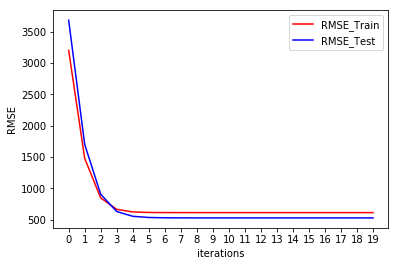

In [43]:
import matplotlib.pyplot as plt
plt.plot(RMSE_Train.keys(),RMSE_Train.values(),color="red",label="RMSE_Train")
plt.plot(RMSE_Test.keys(),RMSE_Test.values(),color="blue",label="RMSE_Test")
plt.xticks(range(len(RMSE_Train)))
plt.xlabel('iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [44]:
final_Test_RMSE = [*RMSE_Test.values()][-1]
final_Test_RMSE

525.4078476456896

## 提交
### 请将一个zip文件上传到Blackboard，该文件包含:
    1. PDF那样
    2. Jupyter笔记本的源代码

### PDF文件应包括以下内容:
    1. 第1部分:
        (a)你对理论问题的解答
    2. 第2部分:
        (a)最终的模型
        (b) RMSE
    3. 第3部分:
        (a)不同S值的RMSE的均值和标准差。
    4. 第4部分:
        (a)RMSE
    5. 第5部分:
        (a)最终的模型
        (b) RMSE
        (c)用于训练和测试数据的RMSE与梯度下降迭代数的图